# 🧠 Lecture 01 - Introduction to Deep Learning


## 1. Introduction

Deep Learning is a subfield of **Machine Learning** that focuses on algorithms inspired by the **structure and function of the human brain**, called **Artificial Neural Networks (ANNs)**.

While traditional Machine Learning algorithms rely heavily on **feature engineering**, Deep Learning models automatically learn to represent data through multiple **hidden layers**.



## 2. Why Deep Learning?

Deep Learning is useful when:
- The dataset is **large and complex** (e.g., images, audio, video).
- We need to **automatically extract patterns** without manual feature design.

It solves these problems by:
- Using **multiple layers** to learn abstract representations of data.
- Leveraging **GPUs** and **big data** for faster and more efficient training.



## 3. Real-World Applications of Deep Learning

| Domain | Application | Example |
|--------|--------------|----------|
| Computer Vision | Image Classification | Detecting objects in images (e.g., cats vs. dogs) |
| Natural Language Processing | Text Translation | Google Translate, ChatGPT |
| Healthcare | Medical Diagnosis | Identifying tumors from X-rays |
| Autonomous Vehicles | Object Detection | Self-driving cars identifying pedestrians |
| Finance | Fraud Detection | Recognizing unusual transaction patterns |



## 4. Structure of a Neural Network

A **Neural Network** consists of:  
- **Input Layer:** Takes input features  
- **Hidden Layers:** Learn patterns  
- **Output Layer:** Produces predictions  

Each layer contains **neurons**, connected with **weights** that adjust during training.



## 5. How Deep Learning Works

1. **Forward Propagation:** Input data moves through layers to generate output.  
2. **Loss Calculation:** Error between predicted and actual output is computed.  
3. **Backward Propagation:** Error is propagated back to update weights using optimization.  
4. **Iteration:** Steps repeat until accuracy improves.


## 6. Practical Implementation (Using TensorFlow + Keras)

In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist



**Explanation:**  
- `tensorflow` → Core Deep Learning library  
- `Sequential` → Build simple feedforward networks  
- `Dense` → Fully connected layer  
- `Flatten` → Converts 2D images into 1D vectors  
- `mnist` → Preloaded dataset of handwritten digits  


In [2]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



**Explanation:**  
We load the MNIST dataset and normalize pixel values (0–255 → 0–1) for faster training.


In [7]:

#model = Sequential([
#    Flatten(input_shape=(28, 28)),
#    Dense(128, activation='relu'),
#    Dense(10, activation='softmax')
#])

# changed dense layer to 64
# changed layer from relu to sigmoid
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])




**Explanation:**  
- **Flatten:** Converts images into one-dimensional vectors.  
- **Dense(128, ‘relu’):** Hidden layer with 128 neurons.  
- **Dense(10, ‘softmax’):** Output layer for 10 classes (digits 0–9).


In [8]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



**Explanation:**  
- **Optimizer (‘adam’):** Adjusts weights.  
- **Loss function:** Measures error.  
- **Metrics:** Tracks accuracy.


In [9]:
# changed epoch to 10
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8602 - loss: 0.4943 - val_accuracy: 0.9485 - val_loss: 0.1776
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9536 - loss: 0.1619 - val_accuracy: 0.9621 - val_loss: 0.1264
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9657 - loss: 0.1167 - val_accuracy: 0.9659 - val_loss: 0.1114
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9729 - loss: 0.0907 - val_accuracy: 0.9684 - val_loss: 0.1005
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9781 - loss: 0.0718 - val_accuracy: 0.9706 - val_loss: 0.0963
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9819 - loss: 0.0603 - val_accuracy: 0.9723 - val_loss: 0.0924
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0491 - val_accuracy: 0.9723 - val_loss: 0.0874
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9870 - loss: 0.0432 - 


**Explanation:**  
Trains the model for 5 epochs while tracking validation accuracy.


In [10]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.1074
Test Accuracy: 0.9728000164031982



**Explanation:**  
Evaluates performance on unseen data.


In [11]:

predictions = model.predict(x_test[:5])
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[2.5967330e-08 1.9508402e-09 2.8735790e-06 3.5426565e-05 1.3987390e-12
  1.4541943e-09 3.5242686e-14 9.9996018e-01 4.2835925e-08 1.4586316e-06]
 [7.1554403e-08 2.2013535e-04 9.9977928e-01 9.2550600e-08 6.7603533e-17
  2.5052191e-10 1.7778901e-10 8.1893953e-13 3.2768071e-07 6.0454381e-14]
 [2.1618847e-08 9.9842179e-01 4.4649540e-05 9.6493784e-07 1.0635743e-05
  1.5087857e-06 3.9745973e-06 1.0289947e-03 4.8729102e-04 1.2168347e-07]
 [9.9998510e-01 2.9433431e-12 3.1912023e-06 3.9408734e-09 1.9355444e-09
  4.8876501e-07 1.1101973e-05 1.2838585e-07 1.6621200e-10 2.6834021e-08]
 [1.3649116e-06 9.3952546e-10 4.3139232e-07 1.6515571e-08 9.9862218e-01
  4.0915118e-08 3.3402198e-06 3.6171972e-05 3.4927439e-06 1.3329902e-03]]



**Explanation:**  
Predicts labels for the first 5 test samples.


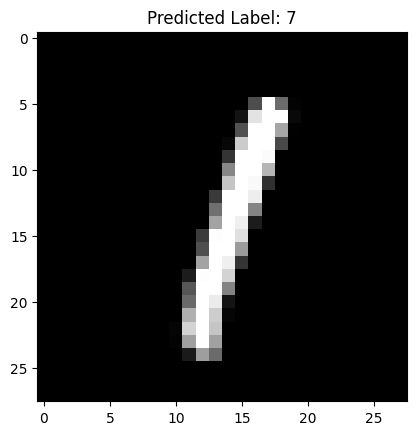

In [12]:

import matplotlib.pyplot as plt

plt.imshow(x_test[5], cmap='gray')
plt.title("Predicted Label: " + str(predictions[0].argmax()))
plt.show()



**Explanation:**  
Displays one test image and shows the predicted label.


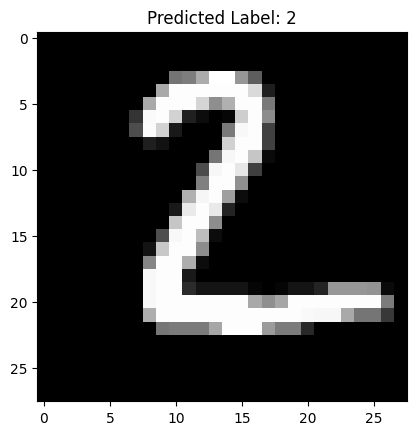

In [14]:

import matplotlib.pyplot as plt

plt.imshow(x_test[1], cmap='gray')
plt.title("Predicted Label: " + str(predictions[1].argmax()))
plt.show()


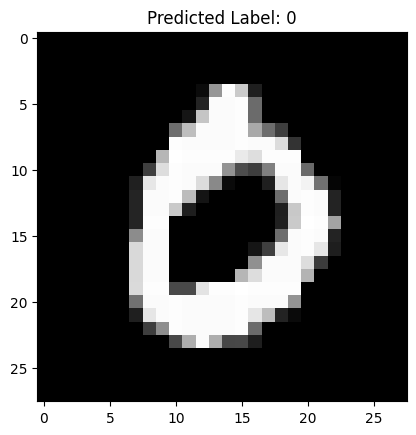

In [15]:

import matplotlib.pyplot as plt

plt.imshow(x_test[3], cmap='gray')
plt.title("Predicted Label: " + str(predictions[3].argmax()))
plt.show()


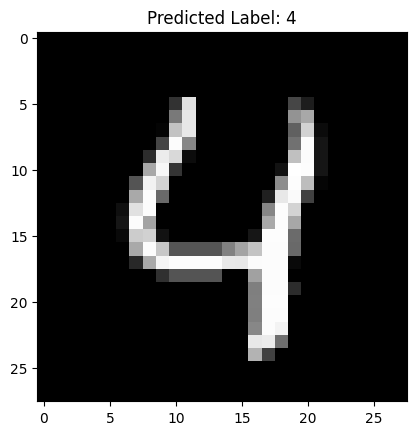

In [16]:

import matplotlib.pyplot as plt

plt.imshow(x_test[4], cmap='gray')
plt.title("Predicted Label: " + str(predictions[4].argmax()))
plt.show()



## 7. Summary

| Concept | Description |
|----------|-------------|
| Deep Learning | Subfield of ML using neural networks |
| Layers | Input, Hidden, Output |
| Training Process | Forward pass, loss calculation, backward pass |
| Framework | TensorFlow/Keras |
| Dataset | MNIST handwritten digits |



## 🧩 8. Student Tasks

### **Task 1:**  
Increase the number of epochs to 10 and observe accuracy improvement.  

### **Task 2:**  
Add one more hidden layer with 64 neurons and compare results.  

### **Task 3:**  
Change activation function from `relu` to `sigmoid` and check performance.  

### **Task 4:**  
Visualize multiple test images with predictions.  

### **Task 5:**  
Train the same model on **Fashion MNIST** and compare results.
